# Regression with POUR data
Use absorbance data from POUR runs
- 10 or 40 mM urea in 0.15M NaCl saline starting concentration
- True urea concentration measured with Beckman chemical analyzer

In [8]:
# Import packages

# Pandas library for the pandas dataframes

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd   

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVR

# Set larger fontsize for all plots
plt.rcParams.update({'font.size': 14})

In [9]:
# Import data

abs_data = pd.read_csv('Datasets/pour_saline_uvvis.csv')

In [10]:
abs_data

,Urea Concentration (mM),Date,Time (hr),Run through (y/n),190,191,192,193,194,195,...,791,792,793,794,795,796,797,798,799,800
0,40.00,"Sept. 14, 2021",0,0,0.000,-0.018,-0.008,-0.040,-0.029,-0.003,...,0.000,-0.004,-0.001,-0.001,-0.002,0.000,-0.001,-0.003,-0.001,-0.002
1,39.76,"Sept. 14, 2021",0,1,0.024,0.014,0.026,0.003,0.010,0.034,...,0.001,-0.003,0.001,0.001,-0.002,0.002,0.001,-0.001,0.001,0.000
2,39.32,"Sept. 14, 2021",1,1,0.110,0.099,0.111,0.090,0.094,0.130,...,-0.001,-0.004,-0.001,-0.003,-0.004,-0.002,-0.001,-0.004,-0.002,-0.002
3,38.87,"Sept. 14, 2021",2,1,0.174,0.203,0.195,0.176,0.192,0.219,...,0.000,-0.002,0.000,0.000,-0.002,0.001,0.000,-0.003,0.000,0.000
4,38.41,"Sept. 14, 2021",3,1,0.223,0.231,0.225,0.188,0.233,0.256,...,0.000,-0.004,0.000,-0.002,-0.003,0.000,-0.001,-0.004,-0.002,-0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,6.14,"Nov. 16, 2021",4,1,0.260,0.254,0.308,0.263,0.321,0.306,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,5.65,"Nov. 16, 2021",5,1,0.284,0.302,0.342,0.298,0.324,0.341,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,5.65,"Nov. 16, 2021",5,1,0.295,0.306,0.330,0.305,0.341,0.345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,6.02,"Nov. 16, 2021",6,1,0.305,0.307,0.341,0.304,0.352,0.328,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Specify features (X) and target (y)

In [11]:
X = abs_data.iloc[:, 9:17].values
y = abs_data[['Urea Concentration (mM)']].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

#### Fit principal component analysis (PCA) and partial least squares (PLS) regression models to the POUR data

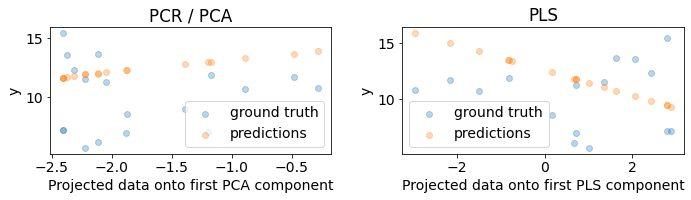

PCR r-squared -0.745
PLS r-squared -1.018


In [13]:
pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[0].scatter(
    pca.transform(X_test), pcr.predict(X_test), alpha=0.3, label="predictions"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="y", title="PCR / PCA"
)
axes[0].legend()
axes[1].scatter(pls.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[1].scatter(
    pls.transform(X_test), pls.predict(X_test), alpha=0.3, label="predictions"
)
axes[1].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[1].legend()
plt.tight_layout()
plt.show()

print(f"PCR r-squared {pcr.score(X_test, y_test):.3f}")
print(f"PLS r-squared {pls.score(X_test, y_test):.3f}")

#### Find best wavelength range

In [8]:
# Create integer lists of starting wavelengths and stopping wavelengths to probe
start_wl = np.linspace(5, 10, num=6)
start_wl = [round(x) for x in start_wl]
stop_wl = np.linspace(11, 100, num=90)
stop_wl = [round(x) for x in stop_wl]

# Initiate lists for results
starting_wavelength = []
stopping_wavelength = []
pcr_r_squared = []
pls_r_squared = []

for start in start_wl:
    for stop in stop_wl:
        X = abs_data.iloc[:, start:stop].values
        y = abs_data[['Urea Concentration (mM)']].values.reshape(-1, 1)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)
        
        pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
        pcr.fit(X_train, y_train)
        pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

        pls = PLSRegression(n_components=1)
        pls.fit(X_train, y_train)
        
        starting_wavelength.append(start)
        stopping_wavelength.append(stop)
        pcr_r_squared.append(pcr.score(X_test, y_test))
        pls_r_squared.append(pls.score(X_test, y_test))
        
# Choose the highest pcr and pls scores and report
pcr_array = np.array(pcr_r_squared)
pcr_max_index = pcr_array.argmax()

pls_array = np.array(pls_r_squared)
pls_max_index = pls_array.argmax()

print(f'Max principal components regression (PCR) score: {pcr_r_squared[pcr_max_index]}')
print(f'Max PCR score starting wavelength: {starting_wavelength[pcr_max_index]}')
print(f'Max PCR score stopping wavelength: {stopping_wavelength[pcr_max_index]}')

print(f'Max partial least squasres (PLS) regression score: {pls_r_squared[pls_max_index]}')
print(f'Max PLS score starting wavelength: {starting_wavelength[pls_max_index]}')
print(f'Max PLS score stopping wavelength: {stopping_wavelength[pls_max_index]}')

Max principal components regression (PCR) score: -0.7453611513115606
Max PCR score starting wavelength: 9
Max PCR score stopping wavelength: 17
Max partial least squasres (PLS) regression score: -0.8806893187356952
Max PLS score starting wavelength: 9
Max PLS score stopping wavelength: 14


## Support Vector Regression (SVR)

### From https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html

Uses RBF - radial basis function, an ANN

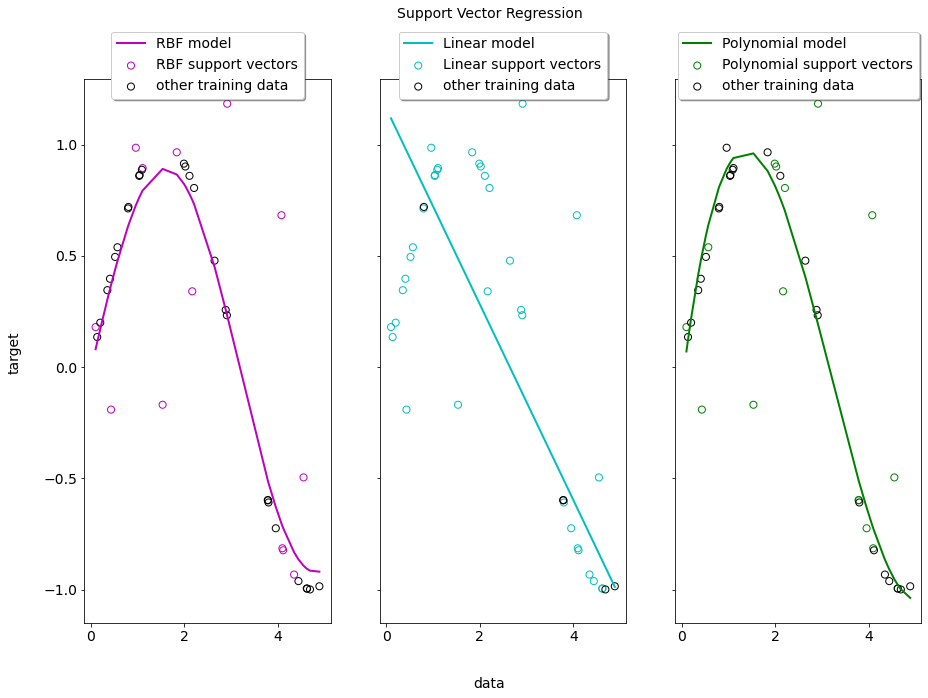

In [9]:
# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

### With POUR data

-0.1407824194061147
-0.134653515466578
-0.13823565605279042


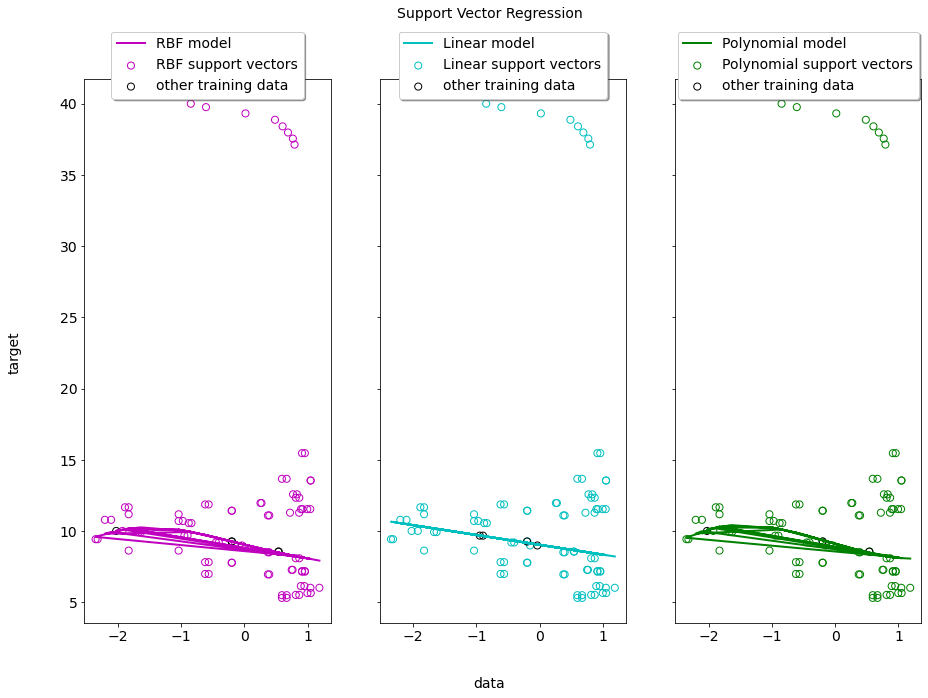

In [6]:
# #############################################################################
# Define X (features) and y (targets)
X = abs_data.iloc[:, 15:16].values
y = abs_data[['Urea Concentration (mM)']].values.ravel()

# #############################################################################
# Scale X (features)
X = StandardScaler().fit_transform(X)

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    print(svr.score(X,y))
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()